In [17]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

###  handlin missing  data
from sklearn.impute import SimpleImputer

### libraries for feature selection 
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest

###To show all columns
pd.set_option('display.max_columns', None)


In [3]:
df_ml = pd.read_csv('C:/Users/HP/Downloads/ML_Data_Return.csv')


In [4]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                15634 non-null  int64  
 1   Entry ID          15634 non-null  int64  
 2   Strategic Sale    15634 non-null  int64  
 3   Destination       15634 non-null  object 
 4   Group             15634 non-null  int64  
 5   Date              15634 non-null  object 
 6   Sequence          15634 non-null  int64  
 7   Product           15634 non-null  int64  
 8   Qty               15634 non-null  int64  
 9   Total Value       15634 non-null  object 
 10  Unit Price        15634 non-null  float64
 11  Planned Date      15634 non-null  object 
 12  Delivered Date    15315 non-null  object 
 13  TYPE              15634 non-null  object 
 14  Qty Delivered     15634 non-null  object 
 15  Order Source      15634 non-null  object 
 16  Logistic Partner  15634 non-null  object

In [5]:
df_ml_tr = df_ml.copy()

In [6]:
df_ml_tr.isnull().sum()

ID                    0
Entry ID              0
Strategic Sale        0
Destination           0
Group                 0
Date                  0
Sequence              0
Product               0
Qty                   0
Total Value           0
Unit Price            0
Planned Date          0
Delivered Date      319
TYPE                  0
Qty Delivered         0
Order Source          0
Logistic Partner      0
Deposit               0
Replacement           0
Market Demand         0
Quarter               0
Week                  0
Strateg Prod          0
Strat Customer        0
ABC                   0
Customer Group        0
dtype: int64

In [7]:
#### CLEANING DATA - DROPPING ALL Null data
df_ml_tr = df_ml_tr.dropna()

In [18]:
df_ml_tr.head(10)

,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group
0,57,17592,1,?,7,1/23/2021,8,4482,250,$112.50,0.45,2/22/2021,2/14/2023,RETURN,250,Channel1,C2,L2,NO,2,2022Q3,4,0,YES,C,176
1,57,17899,1,?,7,5/1/2021,1,4486,2200,$550.00,0.25,5/3/2021,5/16/2023,RETURN,2200,Channel1,C2,L2,NO,2,2022Q3,9,0,YES,C,176
2,66,18072,0,NL,2,6/26/2021,77,4440,30,$214.20,7.14,6/26/2021,7/2/2023,SALE,30,Channel2,C6,L9,NO,3,2022Q4,1,0,No,B,3986
3,17,18181,1,US,2,8/2/2021,11,4440,62,$442.68,7.14,8/2/2021,8/16/2023,SALE,62,Channel2,C2,L2,NO,1,2022Q3,9,0,No,B,684
4,55,18335,1,DE,7,9/13/2021,2,4481,250,$622.50,2.49,7/16/2023,7/9/2023,SALE,250,Channel2,C6,L9,NO,3,2022Q4,12,0,No,C,521
5,66,18378,0,NL,2,9/27/2021,31,4440,500,"$3,570.00",7.14,8/12/2023,8/20/2023,SALE,500,Channel2,C6,L9,NO,3,2022Q1,4,0,No,B,3986
6,66,18397,0,NL,2,10/4/2021,1,4452,99,"$1,906.74",19.26,11/20/2021,5/21/2023,SALE,99,Channel2,C6,L9,NO,3,2022Q3,10,0,No,B,3986
7,66,18397,0,NL,2,10/4/2021,1,4452,19,$365.94,19.26,11/20/2021,5/21/2023,SALE,19,Channel2,C6,L9,NO,3,2022Q3,10,0,No,B,3986
8,55,18462,1,DE,23,10/25/2021,4,4492,500,"$1,715.00",3.43,2/13/2023,2/8/2023,SALE,500,Channel2,C6,L9,NO,3,2022Q3,5,0,No,B,521
9,55,18462,1,DE,23,10/25/2021,4,4492,100,$343.00,3.43,1/1/2023,1/31/2023,SALE,100,Channel2,C6,L9,NO,3,2022Q3,5,0,No,B,521


In [8]:
df_ml_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15315 entries, 0 to 15633
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                15315 non-null  int64  
 1   Entry ID          15315 non-null  int64  
 2   Strategic Sale    15315 non-null  int64  
 3   Destination       15315 non-null  object 
 4   Group             15315 non-null  int64  
 5   Date              15315 non-null  object 
 6   Sequence          15315 non-null  int64  
 7   Product           15315 non-null  int64  
 8   Qty               15315 non-null  int64  
 9   Total Value       15315 non-null  object 
 10  Unit Price        15315 non-null  float64
 11  Planned Date      15315 non-null  object 
 12  Delivered Date    15315 non-null  object 
 13  TYPE              15315 non-null  object 
 14  Qty Delivered     15315 non-null  object 
 15  Order Source      15315 non-null  object 
 16  Logistic Partner  15315 non-null  object 
 17

Convert columns

Convert ID to Object
Convert Entry ID to object
Convert Group to object
Convert Sequence to object
Convert Product to object
Remove the dollar sign from Total value and covert to float
Convert Quantity delivered to int

In [9]:
### describe the dataset and visualise - descriptive statistics 
df_ml_tr.describe()

,ID,Entry ID,Strategic Sale,Group,Sequence,Product,Qty,Unit Price,Market Demand,Week,Strateg Prod,Customer Group
count,15315.000000,15315.000000,15315.000000,15315.000000,15315.000000,15315.000000,15315.000000,15315.000000,15315.000000,15315.000000,15315.0,15315.000000
mean,50.318511,19948.867842,0.428469,14.095005,21.767483,4475.001306,58.953575,10.999413,2.065687,7.453934,0.0,2042.932419
std,20.351669,241.834194,0.494873,9.354715,53.396732,14.680058,292.950284,13.551686,0.978945,3.912123,0.0,1565.639982
min,17.000000,17592.000000,0.000000,2.000000,1.000000,4440.000000,1.000000,0.080000,1.000000,1.000000,0.0,176.000000
25%,17.000000,19771.000000,0.000000,3.000000,2.000000,4464.000000,2.000000,3.430000,1.000000,4.000000,0.0,684.000000
50%,57.000000,19964.000000,0.000000,15.000000,5.000000,4474.000000,8.000000,5.390000,3.000000,8.000000,0.0,1420.000000
75%,66.000000,20142.000000,1.000000,21.000000,17.000000,4492.000000,24.000000,8.410000,3.000000,11.000000,0.0,3986.000000
max,75.000000,20374.000000,1.000000,29.000000,730.000000,4502.000000,11300.000000,55.750000,3.000000,13.000000,0.0,3986.000000


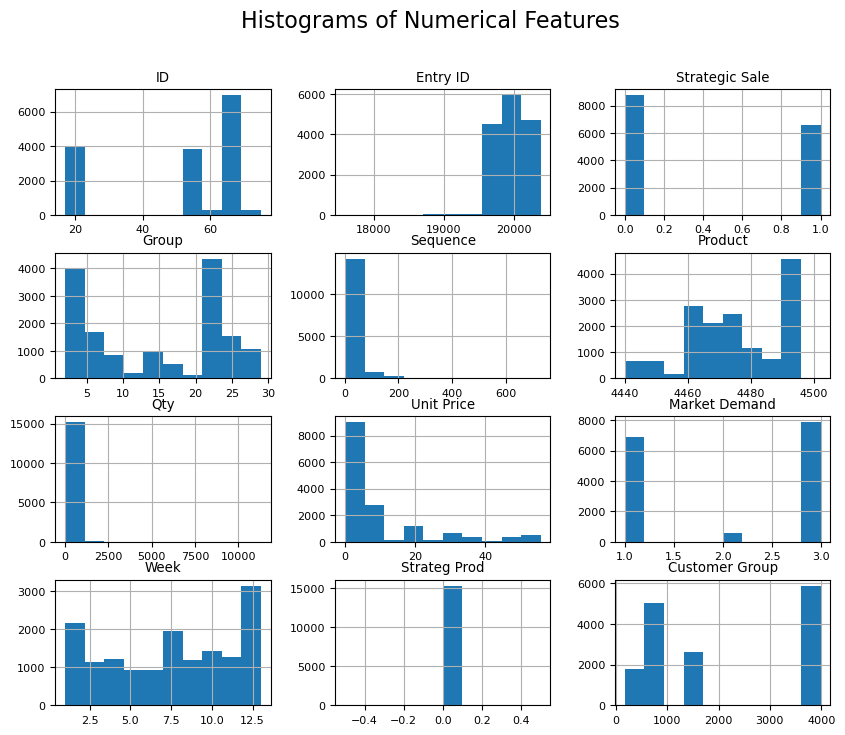

In [13]:

# Histograms

plt.rcParams.update({'font.size': 8})
df_ml_tr.hist(figsize=(10, 8))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()


In [1]:
# Plot histogram
plt.hist(df_ml_tr['Qty'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Histogram of Quantity Column')

# Show plot
plt.show()

NameError: name 'plt' is not defined

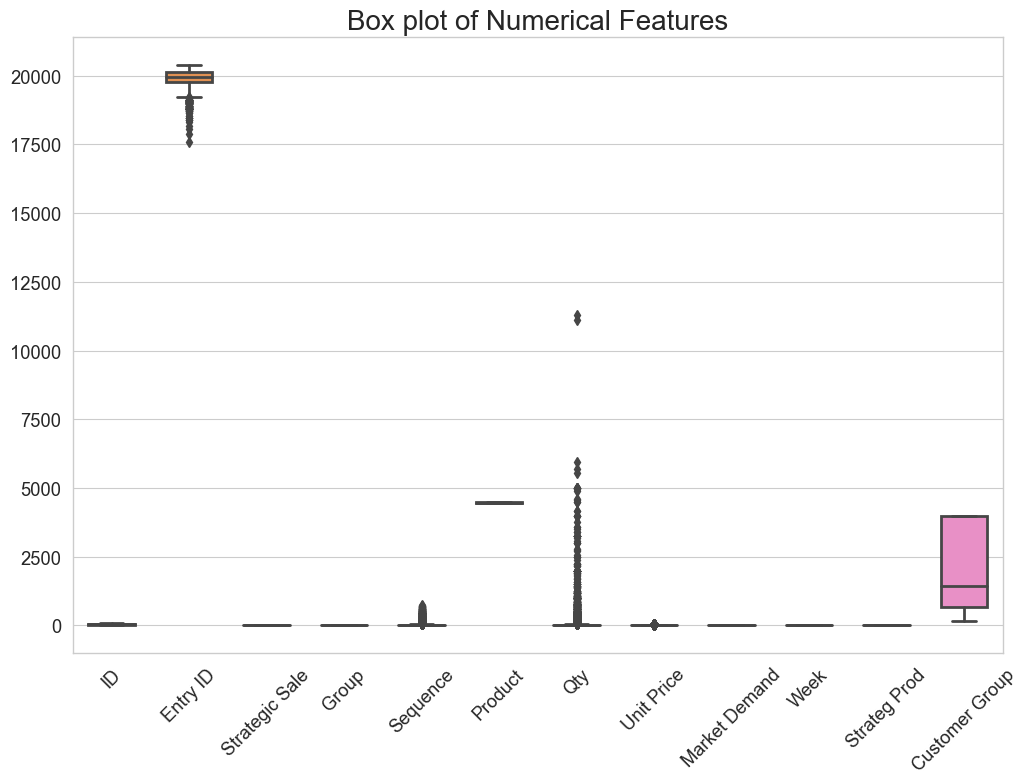

In [15]:

# Set the style of seaborn
sns.set_style("whitegrid")

# Set the linewidth of the boxplot
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(12, 8))

# Adjust the linewidth and saturation
sns.boxplot(data=df_ml_tr, linewidth=2, width=0.6, saturation=0.75)

plt.title('Box plot of Numerical Features', fontsize=20)
plt.xticks(rotation=45)
plt.show()


C:\Users\HP\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


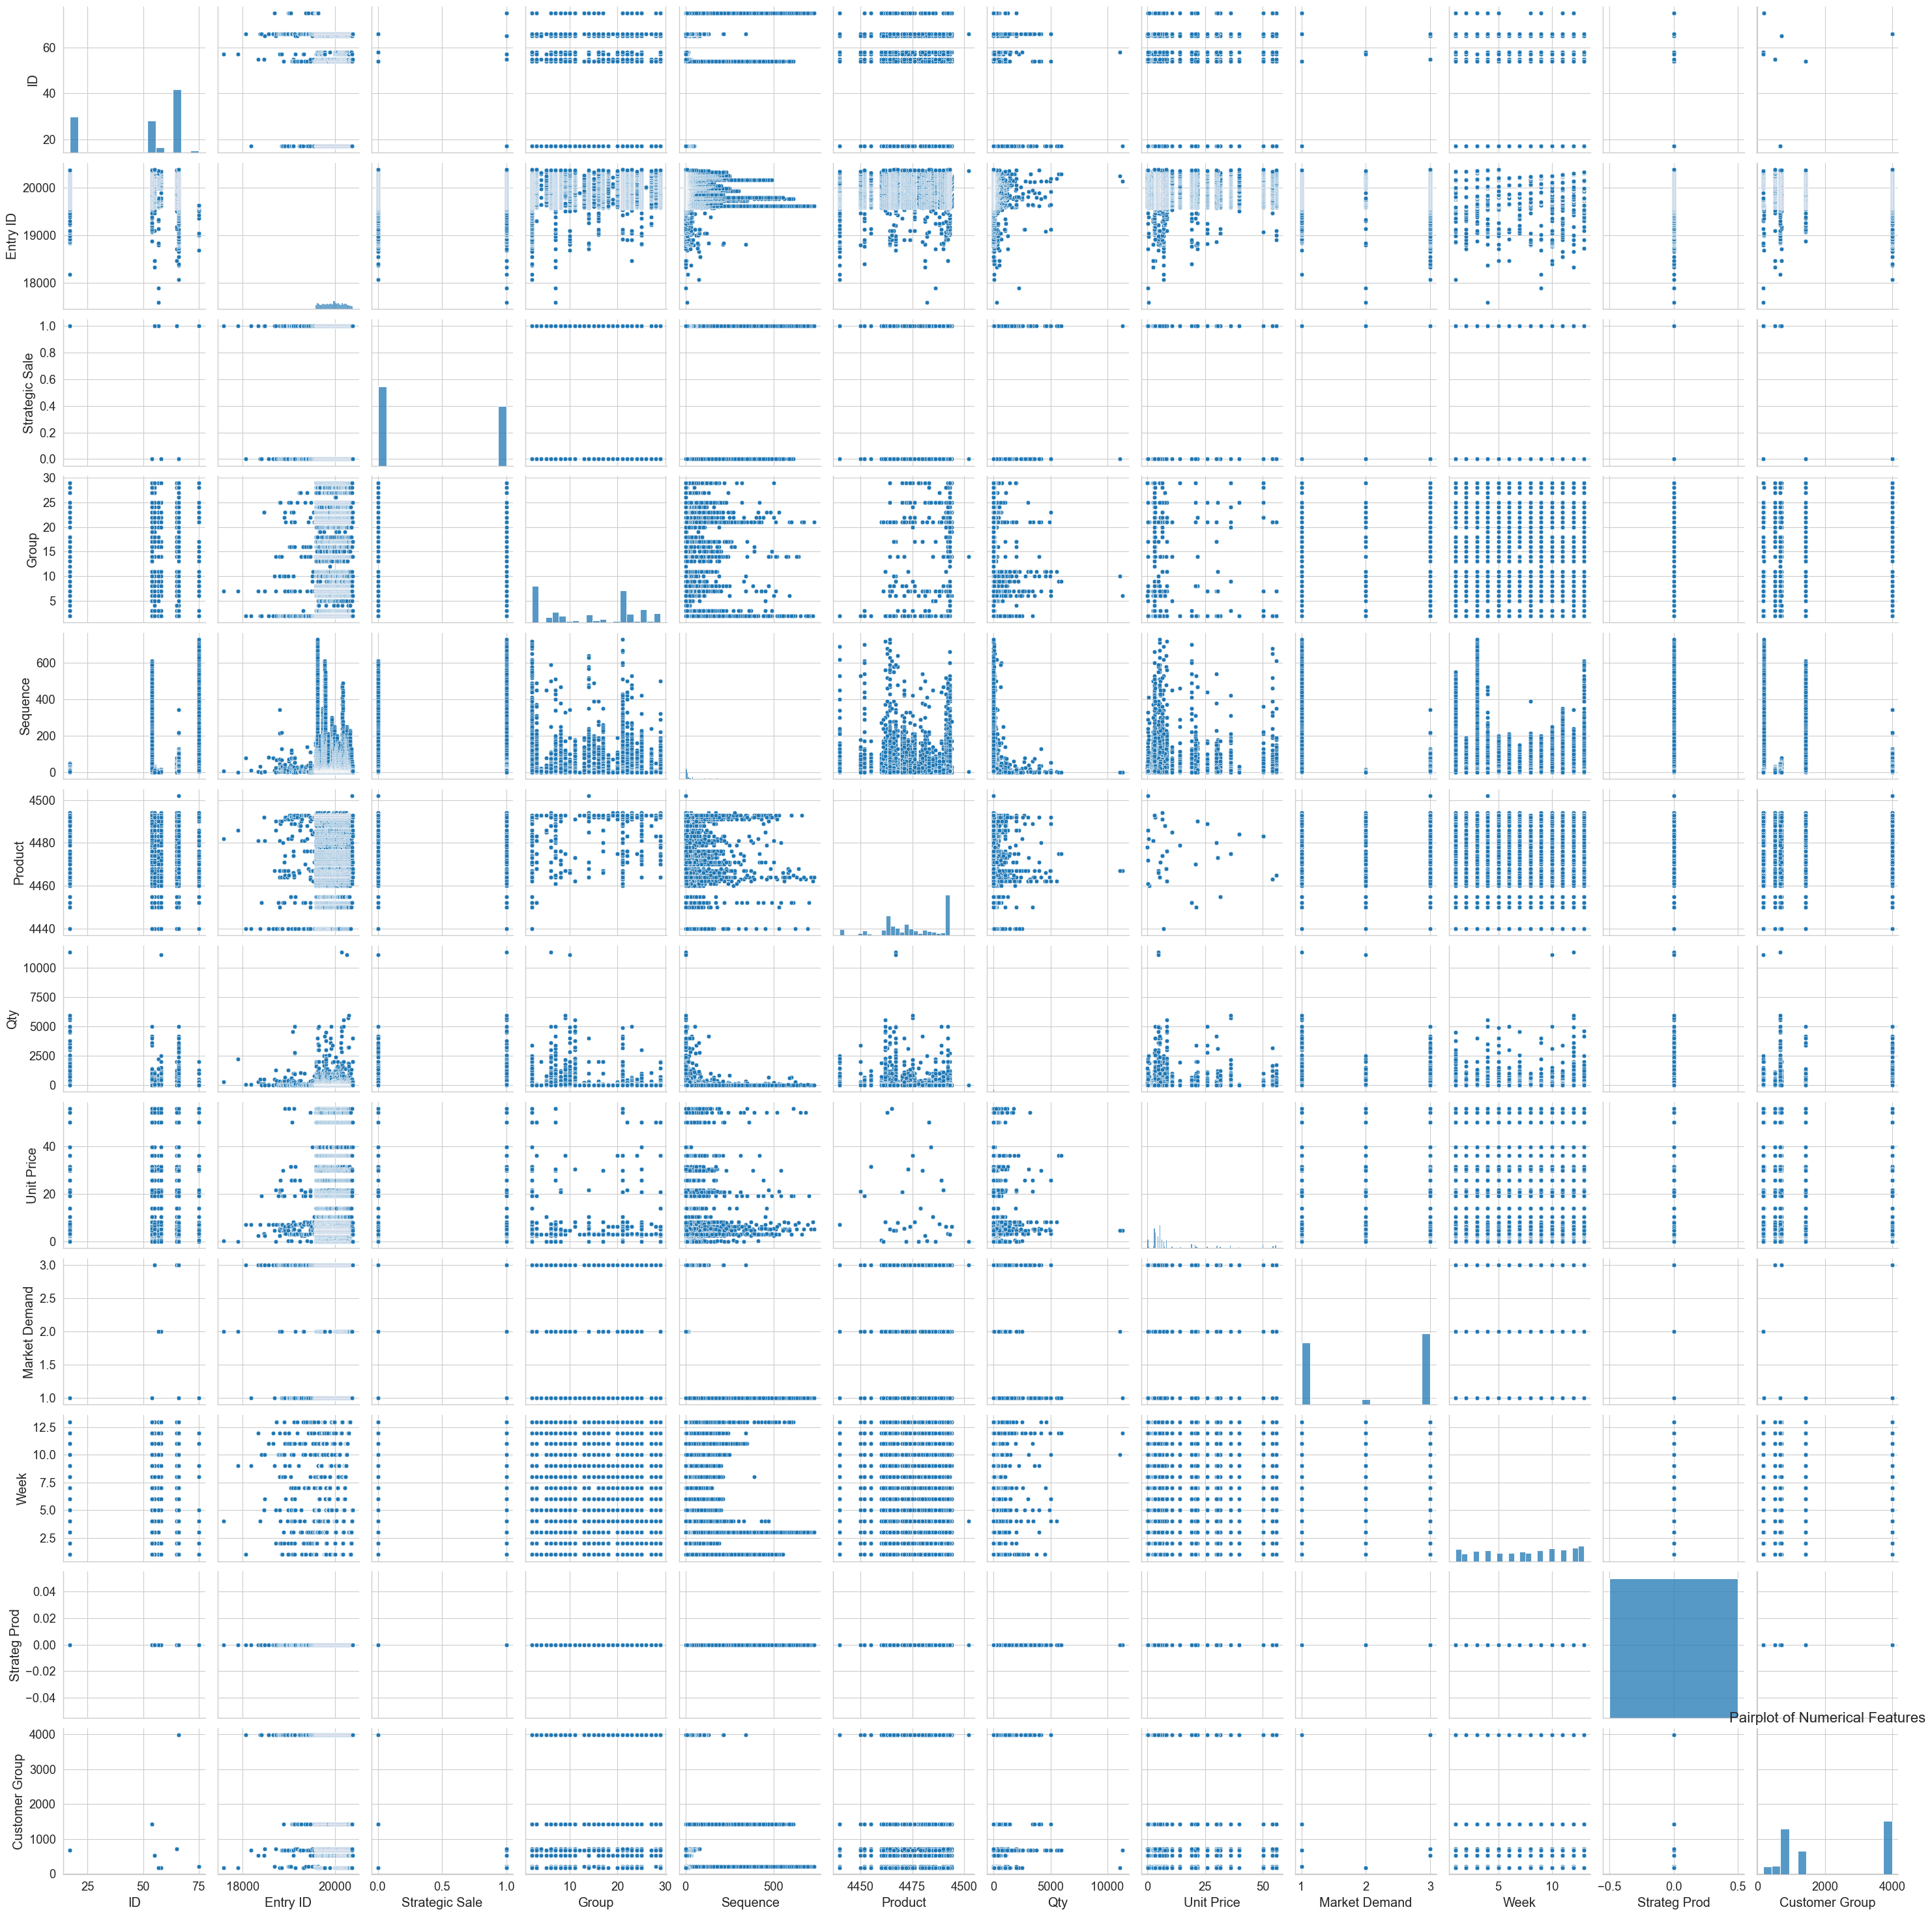

In [19]:
# Pairplot (for visualizing relationships between numerical variables)
sns.pairplot(df_ml_tr)
plt.title('Pairplot of Numerical Features', fontsize=16)
plt.show()

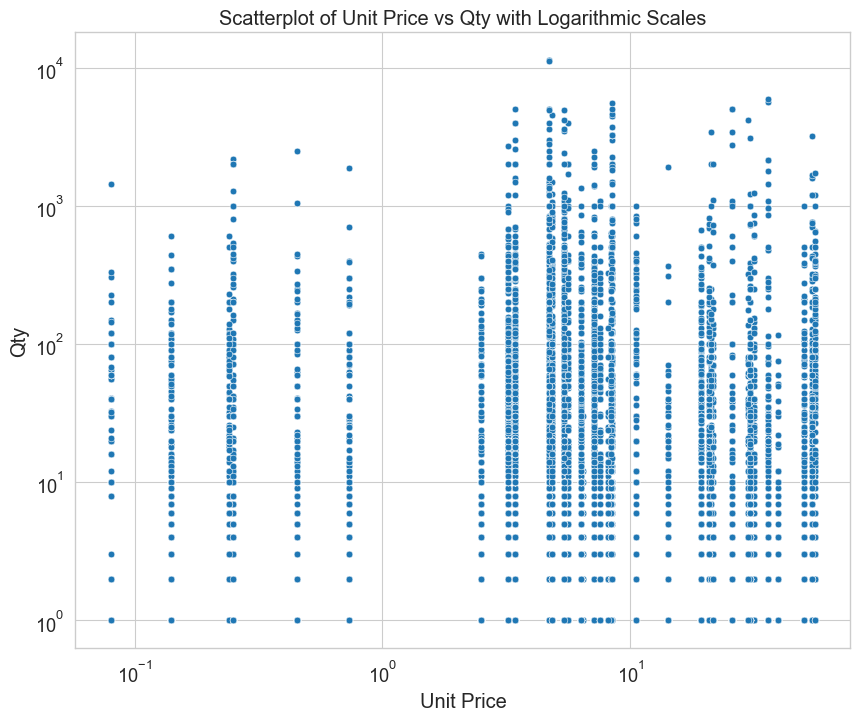

In [21]:
#### Data Exploration / Visualisation 
###  some scatterplots  - set logaritm scale if necessary 
#g_rel.set(yscale="log",xscale="log") ## to observe outliers #

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Unit Price', y='Qty', data=df_ml_tr)
plt.xscale('log')
plt.yscale('log')
plt.title('Scatterplot of Unit Price vs Qty with Logarithmic Scales')
plt.xlabel('Unit Price')
plt.ylabel('Qty')
plt.show()

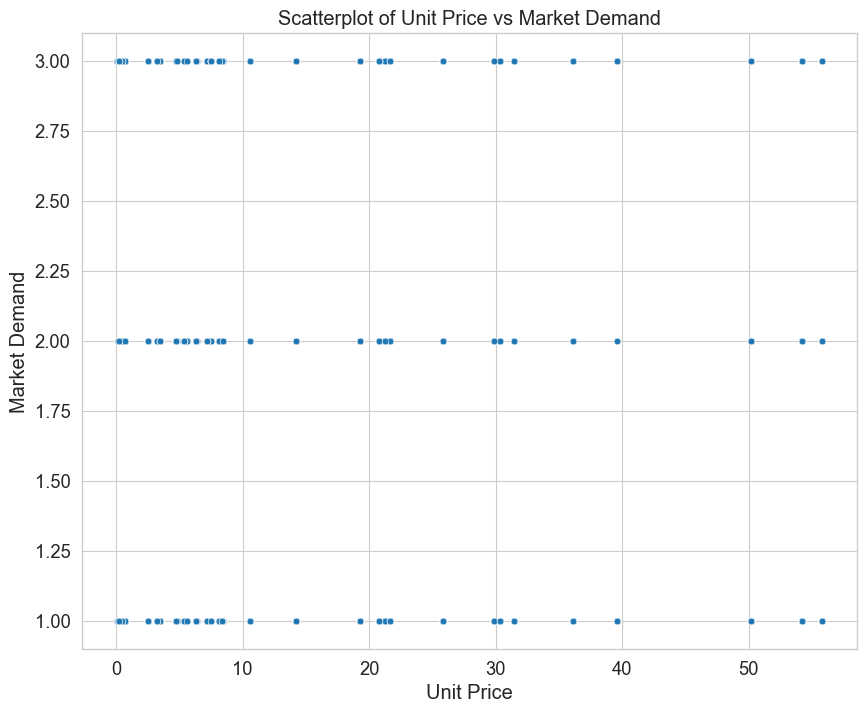

In [26]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Unit Price', y='Market Demand', data=df_ml_tr)
plt.title('Scatterplot of Unit Price vs Market Demand')
plt.xlabel('Unit Price')
plt.ylabel('Market Demand')
plt.show()

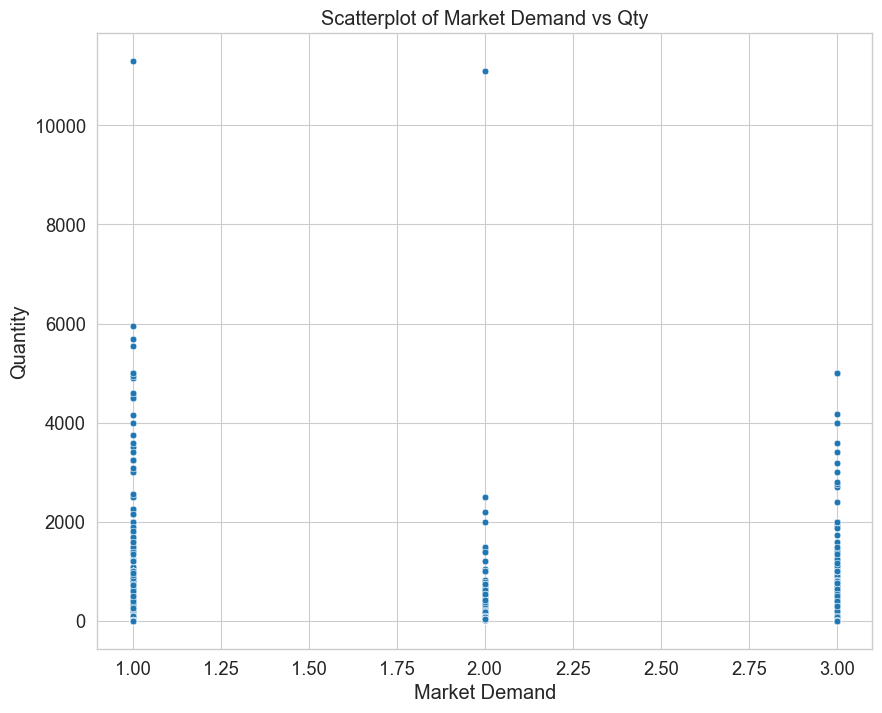

In [25]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Market Demand', y='Qty', data=df_ml_tr)
plt.title('Scatterplot of Market Demand vs Qty')
plt.xlabel('Market Demand')
plt.ylabel('Quantity')
plt.show()

In [38]:

#### records with value zero (10^0)
# Check values zero 

df_ml_tr[(df_ml_tr['Unit Price'] == 0)]

,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group


In [43]:
df_ml_tr['Destination'].value_counts()

Destination
US    7441
NL    5225
GB    1230
DE    1099
ES     120
FR      94
IT      48
BE      34
SE      15
IE       4
PT       3
AT       1
GR       1
Name: count, dtype: int64

In [42]:
## '?' looks like an inconsistent column so it will be replaced by the mode

df_ml_tr['Destination'].replace('?', 'US', inplace=True)
df_ml_tr['Destination'].value_counts()

Destination
US    7441
NL    5225
GB    1230
DE    1099
ES     120
FR      94
IT      48
BE      34
SE      15
IE       4
PT       3
AT       1
GR       1
Name: count, dtype: int64

In [45]:
df_ml_tr['Product'].value_counts()

Product
4493    2142
4464    1915
4492    1739
4466     670
4440     652
4467     627
4471     589
4491     534
4476     503
4452     486
4474     411
4470     388
4483     359
4475     343
4473     327
4465     309
4472     286
4461     241
4481     240
4462     234
4463     230
4480     207
4486     196
4450     193
4488     186
4455     155
4482     151
4489     151
4490     140
4485     138
4460     137
4468     133
4479     124
4478      88
4484      71
4494      19
4502       1
Name: count, dtype: int64

In [46]:
df_ml_tr['TYPE'].value_counts()

TYPE
SALE      14704
RETURN      611
Name: count, dtype: int64

In [47]:
df_ml_tr['Order Source'].value_counts()

Order Source
Channel2    13871
Channel1      935
Channel3      376
Channel4      133
Name: count, dtype: int64

In [49]:
df_ml_tr['Logistic Partner'].value_counts()

Logistic Partner
C6     5343
C2     4078
C7     2342
C13    1402
C8      992
C11     412
C12     277
C4      160
C3      155
C10      72
C9       59
C1       19
C5        4
Name: count, dtype: int64

In [50]:
df_ml_tr['Deposit'].value_counts()

Deposit
L9     5343
L2     4078
L8     2342
L13    1402
L30     992
L11     412
L12     277
L5      160
L3      155
L10      72
L50      59
L1       19
L6        4
Name: count, dtype: int64

In [51]:
df_ml_tr['Strateg Prod'].value_counts()

Strateg Prod
0    15315
Name: count, dtype: int64

In [52]:
df_ml_tr['Strat Customer'].value_counts()

Strat Customer
No     14745
YES      304
Yes      266
Name: count, dtype: int64

In [54]:
#We have to standardise the 'YES' row to 'Yes'

df_ml_tr['Strat Customer'].replace('YES', 'Yes', inplace=True)
df_ml_tr['Strat Customer'].value_counts()

Strat Customer
No     14745
Yes      570
Name: count, dtype: int64

In [55]:
df_ml_tr['ABC'].value_counts()

ABC
B    7720
A    4136
C    3459
Name: count, dtype: int64

In [56]:
df_ml_tr['Customer Group'].value_counts()

Customer Group
3986    5886
684     3980
1420    2598
720     1066
521      946
176      573
200      266
Name: count, dtype: int64

In [57]:
### date treatment 
df_ml_tr['Planned Date'] = pd.to_datetime(df_ml_tr['Planned Date'])
df_ml_tr['Date'] = pd.to_datetime(df_ml_tr['Date'])
df_ml_tr['Delivered Date'] = pd.to_datetime(df_ml_tr['Delivered Date'])


In [58]:
### Values treatment 
df_ml_tr['Total Value '] = df_ml_tr['Total Value '].str.replace('$', '').str.replace(',', '')
df_ml_tr['Total Value '] = df_ml_tr['Total Value '].astype(float)


In [59]:
df_ml_tr.head(10)

,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group
0,57,17592,1,US,7,2021-01-23,8,4482,250,112.50,0.45,2021-02-22,2023-02-14,RETURN,250,Channel1,C2,L2,NO,2,2022Q3,4,0,Yes,C,176
1,57,17899,1,US,7,2021-05-01,1,4486,2200,550.00,0.25,2021-05-03,2023-05-16,RETURN,2200,Channel1,C2,L2,NO,2,2022Q3,9,0,Yes,C,176
2,66,18072,0,NL,2,2021-06-26,77,4440,30,214.20,7.14,2021-06-26,2023-07-02,SALE,30,Channel2,C6,L9,NO,3,2022Q4,1,0,No,B,3986
3,17,18181,1,US,2,2021-08-02,11,4440,62,442.68,7.14,2021-08-02,2023-08-16,SALE,62,Channel2,C2,L2,NO,1,2022Q3,9,0,No,B,684
4,55,18335,1,DE,7,2021-09-13,2,4481,250,622.50,2.49,2023-07-16,2023-07-09,SALE,250,Channel2,C6,L9,NO,3,2022Q4,12,0,No,C,521
5,66,18378,0,NL,2,2021-09-27,31,4440,500,3570.00,7.14,2023-08-12,2023-08-20,SALE,500,Channel2,C6,L9,NO,3,2022Q1,4,0,No,B,3986
6,66,18397,0,NL,2,2021-10-04,1,4452,99,1906.74,19.26,2021-11-20,2023-05-21,SALE,99,Channel2,C6,L9,NO,3,2022Q3,10,0,No,B,3986
7,66,18397,0,NL,2,2021-10-04,1,4452,19,365.94,19.26,2021-11-20,2023-05-21,SALE,19,Channel2,C6,L9,NO,3,2022Q3,10,0,No,B,3986
8,55,18462,1,DE,23,2021-10-25,4,4492,500,1715.00,3.43,2023-02-13,2023-02-08,SALE,500,Channel2,C6,L9,NO,3,2022Q3,5,0,No,B,521
9,55,18462,1,DE,23,2021-10-25,4,4492,100,343.00,3.43,2023-01-01,2023-01-31,SALE,100,Channel2,C6,L9,NO,3,2022Q3,5,0,No,B,521


In [64]:
#### handling missing data 
null=df_ml_tr.isna().sum()
#### impute the overall mean to zero prices
zero_prices = df_ml_tr[df_ml_tr['Unit Price']==0]

print(null)

print(zero_prices)

ID                  0
Entry ID            0
Strategic Sale      0
Destination         0
Group               0
Date                0
Sequence            0
Product             0
Qty                 0
Total Value         0
Unit Price          0
Planned Date        0
Delivered Date      0
TYPE                0
Qty Delivered       0
Order Source        0
Logistic Partner    0
Deposit             0
Replacement         0
Market Demand       0
Quarter             0
Week                0
Strateg Prod        0
Strat Customer      0
ABC                 0
Customer Group      0
dtype: int64
Empty DataFrame
Columns: [ID, Entry ID, Strategic Sale, Destination, Group, Date, Sequence, Product, Qty, Total Value , Unit Price, Planned Date, Delivered Date, TYPE, Qty Delivered, Order Source, Logistic Partner, Deposit, Replacement, Market Demand, Quarter, Week, Strateg Prod, Strat Customer, ABC, Customer Group]
Index: []


There are no products with zero prices but let's use products with aproximate zeri prices as 'zero_pric

In [68]:
df_ml_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15315 entries, 0 to 15633
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                15315 non-null  int64         
 1   Entry ID          15315 non-null  int64         
 2   Strategic Sale    15315 non-null  int64         
 3   Destination       15315 non-null  object        
 4   Group             15315 non-null  int64         
 5   Date              15315 non-null  datetime64[ns]
 6   Sequence          15315 non-null  int64         
 7   Product           15315 non-null  int64         
 8   Qty               15315 non-null  int64         
 9   Total Value       15315 non-null  float64       
 10  Unit Price        15315 non-null  float64       
 11  Planned Date      15315 non-null  datetime64[ns]
 12  Delivered Date    15315 non-null  datetime64[ns]
 13  TYPE              15315 non-null  object        
 14  Qty Delivered     15315 non

In [69]:
## check the average of prices by product --- what would be the best practice here? 
df_ml_tr.groupby('Product').mean()['Unit Price']

TypeError: Could not convert NLUSNLNLNLNLNLNLNLUSGBGBUSUSNLUSNLUSUSUSUSUSUSNLUSUSUSNLNLNLNLUSUSUSUSNLGBGBUSUSUSNLNLGBGBGBUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSITUSUSUSUSUSUSGBGBUSUSUSNLNLNLUSUSUSUSUSUSGBNLUSUSUSPTPTGBUSGRGBNLITUSUSNLFRNLUSGBUSUSGBUSNLUSESNLNLUSGBGBUSUSDEGBESGBUSESFRUSFRNLFRFRFRFRFRFRFRFRFRESESFRFRFRUSUSUSUSFRITITITITNLNLUSFRIEUSUSGBUSUSUSUSNLGBGBFRFRFRFRFRFRFRNLNLFRUSFRFRFRUSFRFRUSUSGBGBESGBESDEDEDEDEUSUSUSUSUSUSUSUSUSUSUSUSUSNLNLUSUSDEDEDEDENLNLNLUSDENLNLNLNLNLNLNLNLDEDENLDEDEDEGBNLUSNLUSNLNLUSNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLUSNLUSNLNLGBNLGBNLUSUSUSUSNLGBNLUSUSUSUSUSNLNLUSUSGBFRFRGBUSFRUSNLNLNLNLDENLUSUSGBGBUSNLNLUSUSNLNLNLNLNLITITITITITITUSFRFRDEFRFRFRFRNLUSUSUSFRDEUSUSFRFRUSUSUSUSUSUSUSUSUSUSFRNLNLNLNLFRFRFRFRFRFRFRFRFRNLNLNLNLNLNLNLESESESESESNLNLNLNLNLUSUSUSUSUSUSUSUSUSUSUSUSUSGBUSGBGBGBDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEUSUSUSUSUSUSUSUSUSUSUSUSUSGBUSUSUSUSUSUSGBDENLUSGBUSUSUSUSUSUSUSUSUSUSUSUSESGBGBUSUSESESUSGBUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSDEUSUSUSUSUSUSUSGBUSESNLNLNLDEITUSITITGBITITITITUSUSITITITITUSNLDENLUSUSUSGBUSUSUSUSUSGBGBGBGBGBNLNLNLNLNLNLNLNLUSGBUSGBUSUSGBGBNLUSUSUSNLNLNLNLNLUSNLUSUSUSUSUSUSUSUSUSUSNLUSUSDEDEDEDEUSUSUSNLNLUSUSUSUSUSUSUSUSUSDEUSUSUSUSUSUSUS to numeric

In [70]:
df_ml_tr['Unit Price'].value_counts()

Unit Price
3.20     2142
5.39     1915
3.43     1739
4.84      670
7.14      652
4.71      627
5.61      589
6.33      534
8.36      503
19.26     486
6.31      411
20.74     388
50.13     359
36.07     343
30.36     327
55.75     309
0.14      287
0.24      241
2.49      240
8.41      234
54.17     230
29.86     207
0.25      196
21.21     193
7.52      186
31.44     155
0.45      151
25.83     151
21.60     140
10.57     138
0.73      137
8.14      133
14.17     124
0.08       88
39.61      71
6.42       19
Name: count, dtype: int64

In [71]:
df_ml_tr['Unit Price'] = df_ml_tr['Unit Price'].astype(float)

In [72]:
df_ml_tr.groupby('Product').mean()['Unit Price']

TypeError: Could not convert NLUSNLNLNLNLNLNLNLUSGBGBUSUSNLUSNLUSUSUSUSUSUSNLUSUSUSNLNLNLNLUSUSUSUSNLGBGBUSUSUSNLNLGBGBGBUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSITUSUSUSUSUSUSGBGBUSUSUSNLNLNLUSUSUSUSUSUSGBNLUSUSUSPTPTGBUSGRGBNLITUSUSNLFRNLUSGBUSUSGBUSNLUSESNLNLUSGBGBUSUSDEGBESGBUSESFRUSFRNLFRFRFRFRFRFRFRFRFRESESFRFRFRUSUSUSUSFRITITITITNLNLUSFRIEUSUSGBUSUSUSUSNLGBGBFRFRFRFRFRFRFRNLNLFRUSFRFRFRUSFRFRUSUSGBGBESGBESDEDEDEDEUSUSUSUSUSUSUSUSUSUSUSUSUSNLNLUSUSDEDEDEDENLNLNLUSDENLNLNLNLNLNLNLNLDEDENLDEDEDEGBNLUSNLUSNLNLUSNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLUSNLUSNLNLGBNLGBNLUSUSUSUSNLGBNLUSUSUSUSUSNLNLUSUSGBFRFRGBUSFRUSNLNLNLNLDENLUSUSGBGBUSNLNLUSUSNLNLNLNLNLITITITITITITUSFRFRDEFRFRFRFRNLUSUSUSFRDEUSUSFRFRUSUSUSUSUSUSUSUSUSUSFRNLNLNLNLFRFRFRFRFRFRFRFRFRNLNLNLNLNLNLNLESESESESESNLNLNLNLNLUSUSUSUSUSUSUSUSUSUSUSUSUSGBUSGBGBGBDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEUSUSUSUSUSUSUSUSUSUSUSUSUSGBUSUSUSUSUSUSGBDENLUSGBUSUSUSUSUSUSUSUSUSUSUSUSESGBGBUSUSESESUSGBUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSDEUSUSUSUSUSUSUSGBUSESNLNLNLDEITUSITITGBITITITITUSUSITITITITUSNLDENLUSUSUSGBUSUSUSUSUSGBGBGBGBGBNLNLNLNLNLNLNLNLUSGBUSGBUSUSGBGBNLUSUSUSNLNLNLNLNLUSNLUSUSUSUSUSUSUSUSUSUSNLUSUSDEDEDEDEUSUSUSNLNLUSUSUSUSUSUSUSUSUSDEUSUSUSUSUSUSUS to numeric

In [73]:
# Calculate the mean of the 'Unit Price' column, excluding NaN values
mean_unit_price = df_ml_tr['Unit Price'].mean(skipna=True)

# Replace NaN values with the calculated mean
df_ml_tr['Unit Price'] = df_ml_tr['Unit Price'].fillna(mean_unit_price)

# Convert the 'Unit Price' column to float
df_ml_tr['Unit Price'] = df_ml_tr['Unit Price'].astype(float)

In [74]:
df_ml_tr.groupby('Product').mean()['Unit Price']

TypeError: Could not convert NLUSNLNLNLNLNLNLNLUSGBGBUSUSNLUSNLUSUSUSUSUSUSNLUSUSUSNLNLNLNLUSUSUSUSNLGBGBUSUSUSNLNLGBGBGBUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSITUSUSUSUSUSUSGBGBUSUSUSNLNLNLUSUSUSUSUSUSGBNLUSUSUSPTPTGBUSGRGBNLITUSUSNLFRNLUSGBUSUSGBUSNLUSESNLNLUSGBGBUSUSDEGBESGBUSESFRUSFRNLFRFRFRFRFRFRFRFRFRESESFRFRFRUSUSUSUSFRITITITITNLNLUSFRIEUSUSGBUSUSUSUSNLGBGBFRFRFRFRFRFRFRNLNLFRUSFRFRFRUSFRFRUSUSGBGBESGBESDEDEDEDEUSUSUSUSUSUSUSUSUSUSUSUSUSNLNLUSUSDEDEDEDENLNLNLUSDENLNLNLNLNLNLNLNLDEDENLDEDEDEGBNLUSNLUSNLNLUSNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLUSNLUSNLNLGBNLGBNLUSUSUSUSNLGBNLUSUSUSUSUSNLNLUSUSGBFRFRGBUSFRUSNLNLNLNLDENLUSUSGBGBUSNLNLUSUSNLNLNLNLNLITITITITITITUSFRFRDEFRFRFRFRNLUSUSUSFRDEUSUSFRFRUSUSUSUSUSUSUSUSUSUSFRNLNLNLNLFRFRFRFRFRFRFRFRFRNLNLNLNLNLNLNLESESESESESNLNLNLNLNLUSUSUSUSUSUSUSUSUSUSUSUSUSGBUSGBGBGBDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEUSUSUSUSUSUSUSUSUSUSUSUSUSGBUSUSUSUSUSUSGBDENLUSGBUSUSUSUSUSUSUSUSUSUSUSUSESGBGBUSUSESESUSGBUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSDEUSUSUSUSUSUSUSGBUSESNLNLNLDEITUSITITGBITITITITUSUSITITITITUSNLDENLUSUSUSGBUSUSUSUSUSGBGBGBGBGBNLNLNLNLNLNLNLNLUSGBUSGBUSUSGBGBNLUSUSUSNLNLNLNLNLUSNLUSUSUSUSUSUSUSUSUSUSNLUSUSDEDEDEDEUSUSUSNLNLUSUSUSUSUSUSUSUSUSDEUSUSUSUSUSUSUS to numeric

In [75]:
# Convert 'Unit Price' column to numeric, coercing non-convertible values to NaN
df_ml_tr['Unit Price'] = pd.to_numeric(df_ml_tr['Unit Price'], errors='coerce')

# Convert NaN values to float
df_ml_tr['Unit Price'] = df_ml_tr['Unit Price'].astype(float)

In [76]:
df_ml_tr.groupby('Product').mean()['Unit Price']

TypeError: Could not convert NLUSNLNLNLNLNLNLNLUSGBGBUSUSNLUSNLUSUSUSUSUSUSNLUSUSUSNLNLNLNLUSUSUSUSNLGBGBUSUSUSNLNLGBGBGBUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSITUSUSUSUSUSUSGBGBUSUSUSNLNLNLUSUSUSUSUSUSGBNLUSUSUSPTPTGBUSGRGBNLITUSUSNLFRNLUSGBUSUSGBUSNLUSESNLNLUSGBGBUSUSDEGBESGBUSESFRUSFRNLFRFRFRFRFRFRFRFRFRESESFRFRFRUSUSUSUSFRITITITITNLNLUSFRIEUSUSGBUSUSUSUSNLGBGBFRFRFRFRFRFRFRNLNLFRUSFRFRFRUSFRFRUSUSGBGBESGBESDEDEDEDEUSUSUSUSUSUSUSUSUSUSUSUSUSNLNLUSUSDEDEDEDENLNLNLUSDENLNLNLNLNLNLNLNLDEDENLDEDEDEGBNLUSNLUSNLNLUSNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLNLUSNLUSNLNLGBNLGBNLUSUSUSUSNLGBNLUSUSUSUSUSNLNLUSUSGBFRFRGBUSFRUSNLNLNLNLDENLUSUSGBGBUSNLNLUSUSNLNLNLNLNLITITITITITITUSFRFRDEFRFRFRFRNLUSUSUSFRDEUSUSFRFRUSUSUSUSUSUSUSUSUSUSFRNLNLNLNLFRFRFRFRFRFRFRFRFRNLNLNLNLNLNLNLESESESESESNLNLNLNLNLUSUSUSUSUSUSUSUSUSUSUSUSUSGBUSGBGBGBDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEDEUSUSUSUSUSUSUSUSUSUSUSUSUSGBUSUSUSUSUSUSGBDENLUSGBUSUSUSUSUSUSUSUSUSUSUSUSESGBGBUSUSESESUSGBUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSDEUSUSUSUSUSUSUSGBUSESNLNLNLDEITUSITITGBITITITITUSUSITITITITUSNLDENLUSUSUSGBUSUSUSUSUSGBGBGBGBGBNLNLNLNLNLNLNLNLUSGBUSGBUSUSGBGBNLUSUSUSNLNLNLNLNLUSNLUSUSUSUSUSUSUSUSUSUSNLUSUSDEDEDEDEUSUSUSNLNLUSUSUSUSUSUSUSUSUSDEUSUSUSUSUSUSUS to numeric

In [77]:
# Select rows where the 'Unit Price' column contains string values
string_values = df_ml_tr.loc[df_ml_tr['Unit Price'].apply(lambda x: isinstance(x, str)), 'Unit Price']

# Print or inspect the string values
print(string_values)

Series([], Name: Unit Price, dtype: float64)


In [78]:
# Convert 'Unit Price' column to numeric, coercing errors to NaN
df_ml_tr['Unit Price'] = pd.to_numeric(df_ml_tr['Unit Price'], errors='coerce')

# Group by 'Product' and calculate the mean of 'Unit Price'
mean_unit_price = df_ml_tr.groupby('Product')['Unit Price'].mean()

# Print the mean unit prices
print(mean_unit_price)

Product
4440     7.14
4450    21.21
4452    19.26
4455    31.44
4460     0.73
4461     0.24
4462     8.41
4463    54.17
4464     5.39
4465    55.75
4466     4.84
4467     4.71
4468     8.14
4470    20.74
4471     5.61
4472     0.14
4473    30.36
4474     6.31
4475    36.07
4476     8.36
4478     0.08
4479    14.17
4480    29.86
4481     2.49
4482     0.45
4483    50.13
4484    39.61
4485    10.57
4486     0.25
4488     7.52
4489    25.83
4490    21.60
4491     6.33
4492     3.43
4493     3.20
4494     6.42
4502     0.14
Name: Unit Price, dtype: float64


In [79]:
df_ml_tr['ABC'].value_counts()

ABC
B    7720
A    4136
C    3459
Name: count, dtype: int64

In [80]:


# Create a SimpleImputer instance with 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Assume df_ml_tr is your DataFrame containing the 'Unit Price' column
# Extract the 'Unit Price' column as a 2D array (reshape needed)
unit_price_column = df_ml_tr['Unit Price'].values.reshape(-1, 1)

# Fit the imputer to the data
imputer.fit(unit_price_column)

# Transform the 'Unit Price' column, replacing missing values
df_ml_tr['Unit Price'] = imputer.transform(unit_price_column)



In [81]:
# Create a SimpleImputer instance with 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Assume df_ml_tr is your DataFrame containing the 'ABC' column
# Extract the 'ABC' column
abc_column = df_ml_tr['ABC'].values.reshape(-1, 1)

# Fit the imputer to the data
imputer.fit(abc_column)

# Transform the 'ABC' column, replacing zeros with the most frequent value
df_ml_tr['ABC'] = imputer.transform(abc_column)

ValueError: 2

In [82]:
# Create a SimpleImputer instance with 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Assume df_ml_tr is your DataFrame containing the 'ABC' column
# Extract the 'ABC' column
abc_column = df_ml_tr['ABC'].values.reshape(-1, 1)

# Fit the imputer to the data
imputer.fit(abc_column)

# Transform the 'ABC' column, replacing zeros with the most frequent value
transformed_abc_column = imputer.transform(abc_column)

# Assign the transformed values back to the 'ABC' column in the DataFrame
df_ml_tr['ABC'] = transformed_abc_column


ValueError: 2

In [83]:
# Create a SimpleImputer instance with 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Assume df_ml_tr is your DataFrame containing the 'ABC' column
# Extract the 'ABC' column
abc_column = df_ml_tr['ABC'].values.reshape(-1, 1)

# Fit the imputer to the data
imputer.fit(abc_column)

# Transform the 'ABC' column, replacing zeros with the most frequent value
transformed_abc_column = imputer.transform(abc_column)

# Reshape the transformed column to match the original shape
transformed_abc_column = transformed_abc_column.reshape(-1)

# Assign the transformed values back to the 'ABC' column in the DataFrame
df_ml_tr['ABC'] = transformed_abc_column

In [84]:
categorical_columns = ['Destination', 'TYPE', 'Order Source', 'Logistic Partner', 'Deposit', 'Replacement', 'Quarter', 'Strat Customer', 'ABC']
chi_square_results = {}
for col in categorical_columns:
    if col != 'ABC':
        contingency_table = pd.crosstab(df_ml_tr['ABC'], df_ml_tr[col])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        chi_square_results[col] = {'chi2': chi2, 'p-value': p}

# If 'ABC' is numerical, you can calculate correlation coefficients with other numerical variables
numerical_columns = ['Strategic Sale', 'Group', 'Sequence', 'Product', 'Qty', 'Total Value', 'Unit Price', 'Market Demand', 'Week', 'Strateg Prod', 'Customer Group']
correlation_results = {}
for col in numerical_columns:
    if col != 'ABC':
        correlation_coefficient = np.corrcoef(df_ml_tr['ABC'], df_ml_tr[col])[0, 1]
        correlation_results[col] = correlation_coefficient

print("Chi-square test results:")
print(chi_square_results)
print("\nCorrelation coefficients:")
print(correlation_results)

NameError: name 'np' is not defined

In [85]:
# Assuming df_ml_tr is your DataFrame
categorical_columns = ['Destination', 'TYPE', 'Order Source', 'Logistic Partner', 'Deposit', 'Replacement', 'Quarter', 'Strat Customer']

# Create a contingency table for each combination of 'ABC' and another categorical variable
chi_square_results = {}
for col in categorical_columns:
    if col != 'ABC':
        contingency_table = pd.crosstab(df_ml_tr['ABC'], df_ml_tr[col])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        chi_square_results[col] = {'chi2': chi2, 'p-value': p}

print("Chi-square test results:")
print(chi_square_results)

Chi-square test results:
{'Destination': {'chi2': 207.1433334939804, 'p-value': 4.306359500595682e-31}, 'TYPE': {'chi2': 13.858640747931467, 'p-value': 0.0009786657691634344}, 'Order Source': {'chi2': 103.02777989600513, 'p-value': 5.85433665737487e-20}, 'Logistic Partner': {'chi2': 145.01961564750619, 'p-value': 2.772274015823377e-19}, 'Deposit': {'chi2': 145.01961564750619, 'p-value': 2.772274015823377e-19}, 'Replacement': {'chi2': 254.86240447792545, 'p-value': 4.542888161469009e-56}, 'Quarter': {'chi2': 18.764411379815424, 'p-value': 0.004580570800430908}, 'Strat Customer': {'chi2': 8.503664762218682, 'p-value': 0.01423812032856755}}


In [89]:
# Identify object columns
object_columns = df_ml_tr.select_dtypes(include=['object']).columns

# Encode object columns as categories
df_ml_tr[object_columns] = df_ml_tr[object_columns].astype('category')

# Create categories for type categorical columns
type_cat_columns = ['Destination', 'TYPE', 'Order Source', 'Logistic Partner', 'Deposit', 'Replacement', 'Quarter', 'Strat Customer']

for col in type_cat_columns:
    df_ml_tr[col] = df_ml_tr[col].astype('category')

# Verify the changes
print(df_ml_tr.dtypes)

ID                           int64
Entry ID                     int64
Strategic Sale               int64
Destination               category
Group                        int64
Date                datetime64[ns]
Sequence                     int64
Product                      int64
Qty                          int64
Total Value                float64
Unit Price                 float64
Planned Date        datetime64[ns]
Delivered Date      datetime64[ns]
TYPE                      category
Qty Delivered             category
Order Source              category
Logistic Partner          category
Deposit                   category
Replacement               category
Market Demand                int64
Quarter                   category
Week                         int64
Strateg Prod                 int64
Strat Customer            category
ABC                       category
Customer Group               int64
dtype: object


In [90]:
for col in df_ml_tr.select_dtypes(include=['category']).columns:
    df_ml_tr[col] = pd.factorize(df_ml_tr[col])[0]

In [91]:
df_ml_tr.head(10)

,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group
0,57,17592,1,0,7,2021-01-23,8,4482,250,112.50,0.45,2021-02-22,2023-02-14,0,0,0,0,0,0,2,0,4,0,0,0,176
1,57,17899,1,0,7,2021-05-01,1,4486,2200,550.00,0.25,2021-05-03,2023-05-16,0,1,0,0,0,0,2,0,9,0,0,0,176
2,66,18072,0,1,2,2021-06-26,77,4440,30,214.20,7.14,2021-06-26,2023-07-02,1,2,1,1,1,0,3,1,1,0,1,1,3986
3,17,18181,1,0,2,2021-08-02,11,4440,62,442.68,7.14,2021-08-02,2023-08-16,1,3,1,0,0,0,1,0,9,0,1,1,684
4,55,18335,1,2,7,2021-09-13,2,4481,250,622.50,2.49,2023-07-16,2023-07-09,1,0,1,1,1,0,3,1,12,0,1,0,521
5,66,18378,0,1,2,2021-09-27,31,4440,500,3570.00,7.14,2023-08-12,2023-08-20,1,4,1,1,1,0,3,2,4,0,1,1,3986
6,66,18397,0,1,2,2021-10-04,1,4452,99,1906.74,19.26,2021-11-20,2023-05-21,1,5,1,1,1,0,3,0,10,0,1,1,3986
7,66,18397,0,1,2,2021-10-04,1,4452,19,365.94,19.26,2021-11-20,2023-05-21,1,6,1,1,1,0,3,0,10,0,1,1,3986
8,55,18462,1,2,23,2021-10-25,4,4492,500,1715.00,3.43,2023-02-13,2023-02-08,1,4,1,1,1,0,3,0,5,0,1,1,521
9,55,18462,1,2,23,2021-10-25,4,4492,100,343.00,3.43,2023-01-01,2023-01-31,1,7,1,1,1,0,3,0,5,0,1,1,521


In [92]:
df_ml_tr = pd.get_dummies(df_ml_tr, columns=df_ml_tr.select_dtypes(include=['category']).columns)

In [93]:
df_ml_tr 

,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,Qty,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group
0,57,17592,1,0,7,2021-01-23,8,4482,250,112.50,0.45,2021-02-22,2023-02-14,0,0,0,0,0,0,2,0,4,0,0,0,176
1,57,17899,1,0,7,2021-05-01,1,4486,2200,550.00,0.25,2021-05-03,2023-05-16,0,1,0,0,0,0,2,0,9,0,0,0,176
2,66,18072,0,1,2,2021-06-26,77,4440,30,214.20,7.14,2021-06-26,2023-07-02,1,2,1,1,1,0,3,1,1,0,1,1,3986
3,17,18181,1,0,2,2021-08-02,11,4440,62,442.68,7.14,2021-08-02,2023-08-16,1,3,1,0,0,0,1,0,9,0,1,1,684
4,55,18335,1,2,7,2021-09-13,2,4481,250,622.50,2.49,2023-07-16,2023-07-09,1,0,1,1,1,0,3,1,12,0,1,0,521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,66,20374,0,3,21,2022-12-31,4,4466,2,9.68,4.84,2023-12-31,2023-12-31,1,47,1,3,3,0,3,0,5,0,1,1,3986
15630,66,20374,0,3,3,2022-12-31,8,4468,8,65.12,8.14,2023-12-31,2023-12-31,1,12,1,3,3,0,3,0,5,0,1,0,3986
15631,66,20374,0,3,2,2022-12-31,10,4483,4,200.52,50.13,2023-12-31,2023-12-31,1,19,1,3,3,0,3,0,5,0,1,1,3986
15632,66,20374,0,3,3,2022-12-31,3,4468,8,65.12,8.14,2023-12-31,2023-12-31,1,12,1,3,3,0,3,0,5,0,1,0,3986


Text(0.5, 1.0, 'Correlation Heatmap')

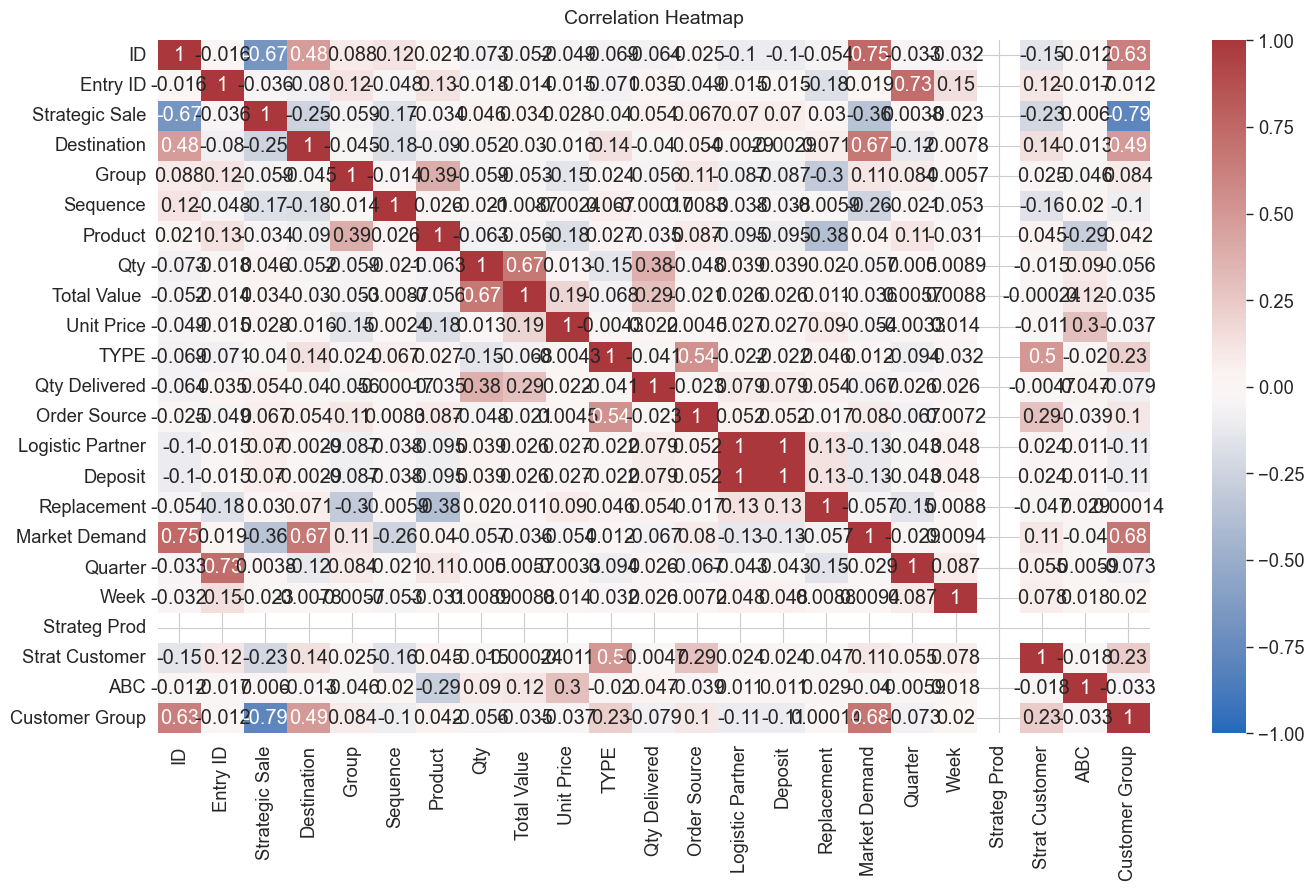

In [95]:
# Select only numeric columns
numeric_columns = df_ml_tr .select_dtypes(include='number')

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(numeric_columns.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

In [61]:
#### handling missing data - Categories 


## impute zeros categories by most-frequent - ABC
### Has ABC any relationship to any other variables?  what would be the best practice here? 


In [62]:
#### Encoding 
#### create categories for type cat columns 

#### encode all the object and convert as categories
### df_ml_cat.select_dtypes(include=['object']).columns


In [63]:
# Convert each categorical column to an integer / dummy variables 


In [64]:
#### Feature Selection  
#### Select fields that contributes to the Return Prediction Model 

##using correlation 
### observe the correlation (heat map) what is possible to conclude?
## IS correlation the best method for Future Selection? 

In [97]:
### select all relevant columns - example below ##
columns  = ['ABC','Customer Group','Strateg Prod','Strategic Sale','Group','Product','Order Source','Logistic Partner','Deposit','Replacement','Week']

## Using SelectKBest  
## get all the relevant fields recommented by the model 

In [2]:

X = df_ml_tr[columns]  
y = df_ml_tr['ABC']  


k_best_selector = SelectKBest(score_func=chi2, k='all')
k_best_selector.fit(X, y
selected_indices = k_best_selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

print("Selected Features:")
print(selected_features)


SyntaxError: '(' was never closed (1375137508.py, line 6)

In [103]:
############### here is the current dataframe used by the ML Return Model 

features_df_new = df_ml_tr[columns].iloc[:,filter]

### final dataset processed with columns : 
#Customer Group 	Group 	Product 	Deposit 	Week

TypeError: filter expected 2 arguments, got 1

In [ ]:
### by creating extra columns in your improved code (Feature engineering) , what will be the change in your dataframe, any relevant change? 
#### test this hipothesis  in your improved code 